# Task 2: Resize Images and Masks

In [1]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #this line is to avoid a kernel die problem that caused by matplotlib



In [2]:
#this function is to double check the image and masks fine names consistency
def match_im_msk(img_files,msk_files):
    
    pure_img_names=[]
    pure_msk_names=[]

    for im in img_files:
        pure_img_names+= [os.path.basename(im)]
    for msk in msk_files:
        pure_msk_names+= [os.path.basename(msk)]
    
    return(pure_img_names==pure_msk_names)

In [3]:
# loading data
data_dir = "./data/task2/original/"

img_files = glob.glob(data_dir+"images/*.jpg")
msk_files=glob.glob(data_dir+"masks/*.png")
match_im_msk(img_files,msk_files)
#this mismatch is due to the png extension

False

In [5]:
image_sizes=[]
mask_sizes=[]
for im in img_files[:2]:
    image = Image.open(im)
    image_sizes+=[list(image.size)]

for msk in msk_files[:2]:
    mask = Image.open(msk)
    mask_sizes+=[list(mask.size)]
#match_im_msk(image_sizes,mask_sizes)

H median 740
W median 570


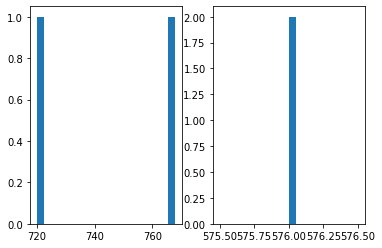

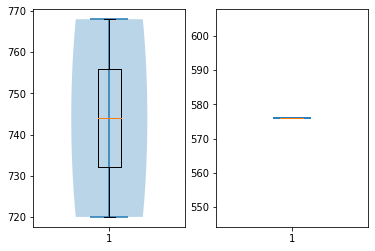

In [6]:
# Check the stats of the height and width

median_w =int(np.quantile(np.array(image_sizes)[:,0],0.5)/10)*10
median_h =int(np.quantile(np.array(image_sizes)[:,1],0.5)/10)*10
print("H median",median_w)
print("W median",median_h)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(np.array(image_sizes)[:,0],bins=20);
ax2.hist(np.array(image_sizes)[:,1],bins=20);
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(np.array(image_sizes)[:,0]);
ax1.violinplot(np.array(image_sizes)[:,0]);

ax2.boxplot(np.array(image_sizes)[:,1]);
ax2.violinplot(np.array(image_sizes)[:,1]);
plt.show()


In [12]:
# A function that takes an image/mask and save the resized version of it

def resize_images(file_names,target_w,target_h,save_path):
    for i,f in enumerate(file_names):
        img = Image.open(f)
        img2 = img.resize((target_w,target_h), Image.ANTIALIAS)
        im_file_name=os.path.basename(f)
        img2.save(save_path+im_file_name)
    print(i+1,"files resized")


In [14]:
#decided to set the Hand W to 512
target_h=512
target_w=512
resized_folder="./data/task2/resized/"
resize_images(img_files,target_w,target_h,save_path=resized_folder+"images/")
resize_images(msk_files,target_w,target_h,resized_folder+"masks/")

590 files resized
590 files resized
